<a href="https://colab.research.google.com/github/kshitijain902/Machine_learning/blob/main/Chronic_Kidney_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings(action='ignore')

In [78]:
df=pd.read_csv("/content/drive/MyDrive/dataset/kidney_disease.csv")

In [79]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [80]:
df.shape

(400, 26)

In [81]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [82]:
for i in df.columns:
    print("unique values in {}:\n".format(i),df[i].unique())

unique values in id:
 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [84]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [85]:
df['classification'].value_counts()


classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

In [86]:
for i in range(df.shape[0]):
    if df.iloc[i,25]=='ckd\t':
        df.iloc[i,25]='ckd'
    if df.iloc[i,20] in [' yes','\tyes']:
        df.iloc[i,20]='yes'
    if df.iloc[i,20]=='\tno':
        df.iloc[i,20]='no'
    if df.iloc[i,21]=='\tno':
        df.iloc[i,21]='no'
    if df.iloc[i,16]=='\t?':
        df.iloc[i,16]=np.nan
    if df.iloc[i,16]=='\t43':
        df.iloc[i,16]='43'
    if df.iloc[i,17]=='\t?':
        df.iloc[i,17]=np.nan
    if df.iloc[i,17]=='\t6200':
        df.iloc[i,17]= '6200'
    if df.iloc[i,17]=='\t8400':
        df.iloc[i,17]= '6200'
    if df.iloc[i,18]=='\t?':
        df.iloc[i,18]=np.nan
    if df.iloc[i,25]=='ckd':
        df.iloc[i,25]='yes'
    if df.iloc[i,25]=='notckd':
        df.iloc[i,25]='no'

In [87]:
df['classification'].value_counts()

classification
yes    250
no     150
Name: count, dtype: int64

In [88]:
df=df.drop(['id'],axis=1)
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             248 non-null    object 
 6   pc              335 non-null    object 
 7   pcc             396 non-null    object 
 8   ba              396 non-null    object 
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             329 non-null    object 
 16  wc              294 non-null    object 
 17  rc              269 non-null    obj

In [89]:
from sklearn.preprocessing import LabelEncoder
for i in df.columns:
    if df[i].dtype=='object':
        df[i]=LabelEncoder().fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             391 non-null    float64
 1   bp              388 non-null    float64
 2   sg              353 non-null    float64
 3   al              354 non-null    float64
 4   su              351 non-null    float64
 5   rbc             400 non-null    int64  
 6   pc              400 non-null    int64  
 7   pcc             400 non-null    int64  
 8   ba              400 non-null    int64  
 9   bgr             356 non-null    float64
 10  bu              381 non-null    float64
 11  sc              383 non-null    float64
 12  sod             313 non-null    float64
 13  pot             312 non-null    float64
 14  hemo            348 non-null    float64
 15  pcv             400 non-null    int64  
 16  wc              400 non-null    int64  
 17  rc              400 non-null    int

In [90]:
df.isnull().sum()

age                9
bp                12
sg                47
al                46
su                49
rbc                0
pc                 0
pcc                0
ba                 0
bgr               44
bu                19
sc                17
sod               87
pot               88
hemo              52
pcv                0
wc                 0
rc                 0
htn                0
dm                 0
cad                0
appet              0
pe                 0
ane                0
classification     0
dtype: int64

In [91]:
from sklearn.impute import KNNImputer
imp=KNNImputer(n_neighbors=5)
data_p=imp.fit_transform(df)
data_p=pd.DataFrame(data_p,columns=df.columns)
data_p.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

<Axes: >

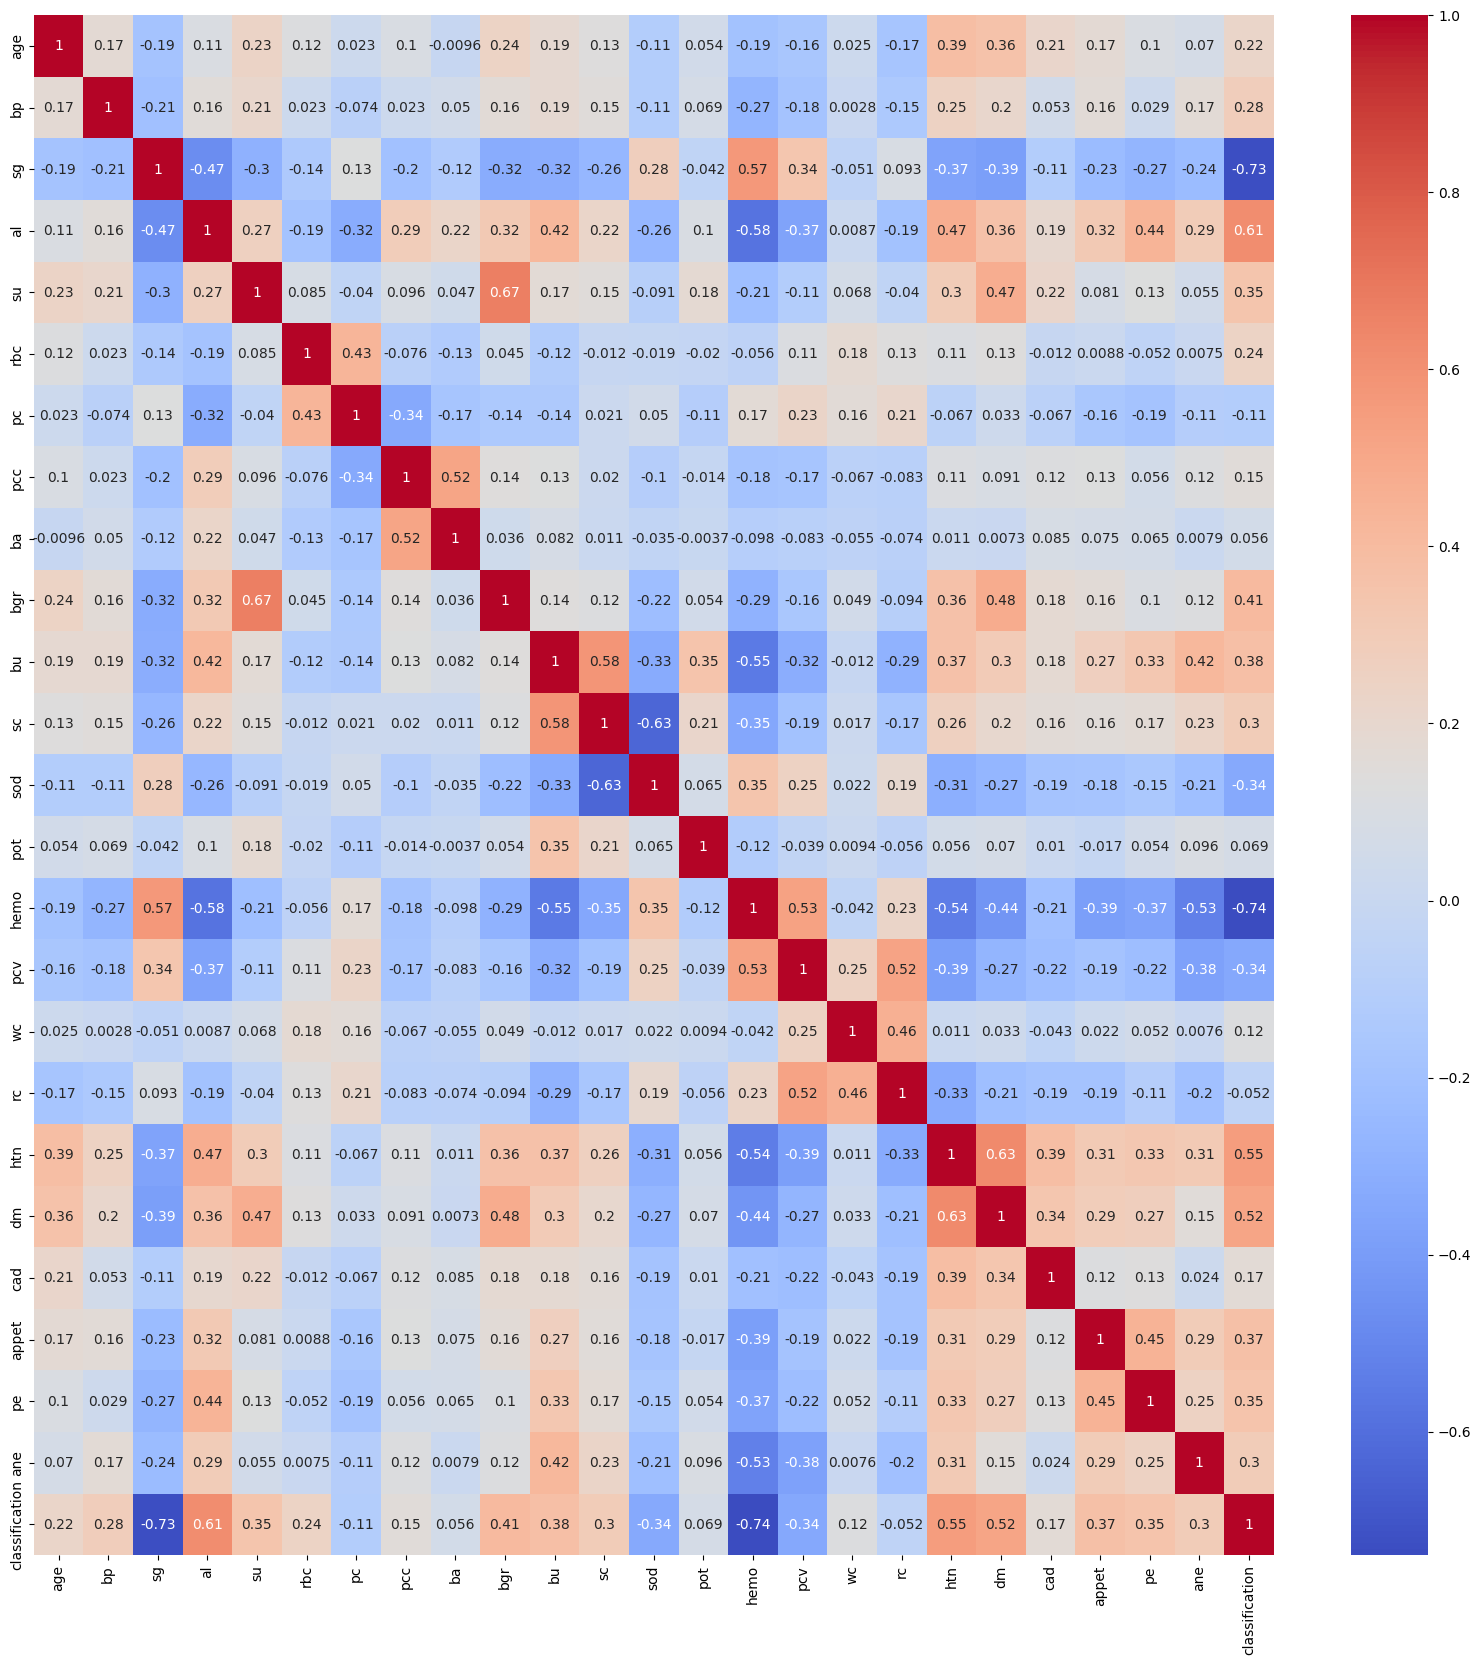

In [92]:

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
sns.heatmap(data_p.corr(),annot=True,cmap='coolwarm')

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bp'}>,
        <Axes: title={'center': 'sg'}>, <Axes: title={'center': 'al'}>,
        <Axes: title={'center': 'su'}>],
       [<Axes: title={'center': 'rbc'}>, <Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'pcc'}>, <Axes: title={'center': 'ba'}>,
        <Axes: title={'center': 'bgr'}>],
       [<Axes: title={'center': 'bu'}>, <Axes: title={'center': 'sc'}>,
        <Axes: title={'center': 'sod'}>, <Axes: title={'center': 'pot'}>,
        <Axes: title={'center': 'hemo'}>],
       [<Axes: title={'center': 'pcv'}>, <Axes: title={'center': 'wc'}>,
        <Axes: title={'center': 'rc'}>, <Axes: title={'center': 'htn'}>,
        <Axes: title={'center': 'dm'}>],
       [<Axes: title={'center': 'cad'}>,
        <Axes: title={'center': 'appet'}>,
        <Axes: title={'center': 'pe'}>, <Axes: title={'center': 'ane'}>,
        <Axes: title={'center': 'classification'}>]], dtype=object)

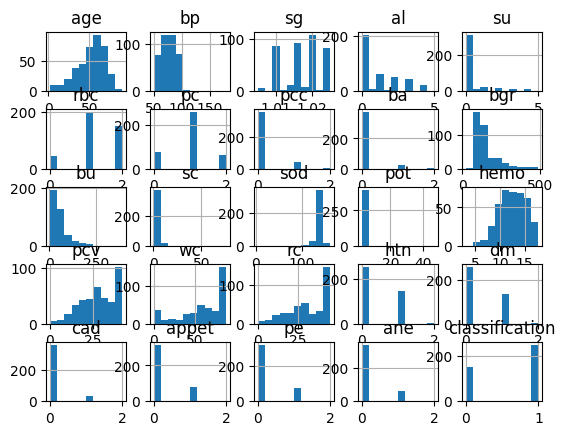

In [93]:
data_p.hist()

In [94]:
y=data_p['classification']
x=data_p.drop(['classification'],axis=1)

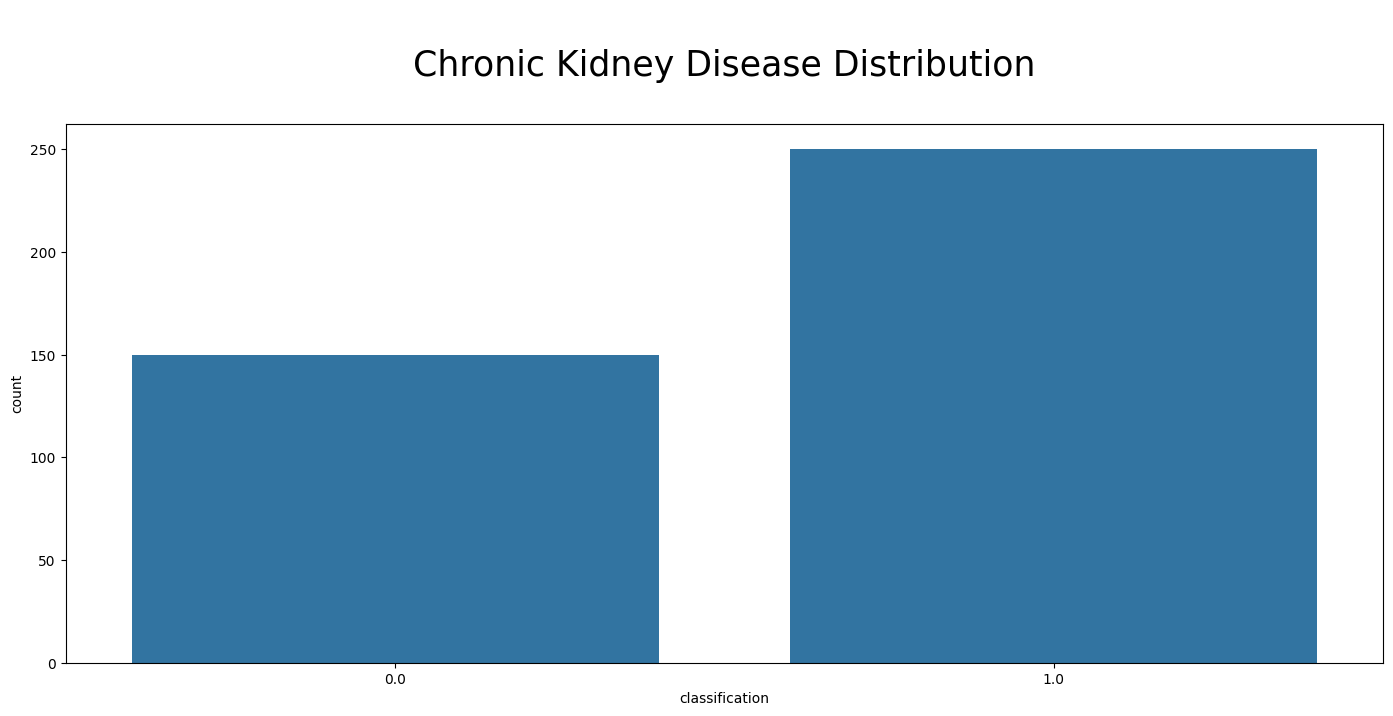

In [95]:
plt.figure(figsize=(17,7))
sns.countplot(data=data_p, x="classification")
plt.title("\nChronic Kidney Disease Distribution\n", fontsize=25)
plt.show();

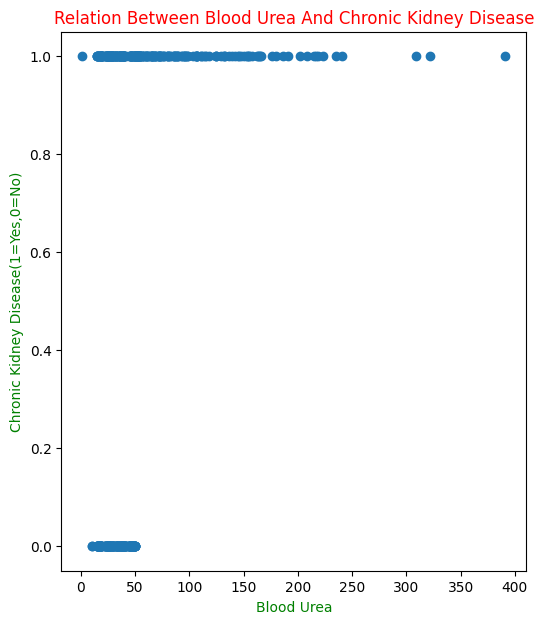

In [96]:
fig, ax = plt.subplots(figsize=(6,7))
M=data_p[['bu']]
N=data_p[['classification']]
plt.title("Relation Between Blood Urea And Chronic Kidney Disease",color="red");
plt.xlabel("Blood Urea",color="green")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)",color="green")
ax.scatter(M,N);
plt.show();

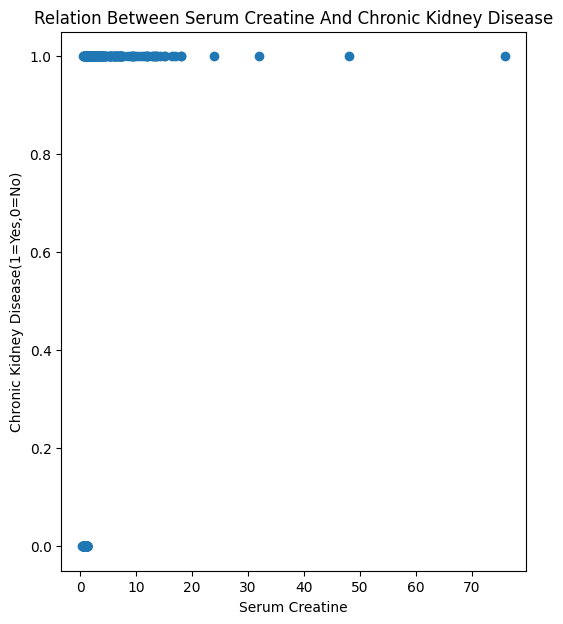

In [97]:
fig, ax = plt.subplots(figsize=(6,7))
M=data_p[['sc']]
N=data_p[['classification']]
plt.title("Relation Between Serum Creatine And Chronic Kidney Disease");
plt.xlabel("Serum Creatine")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

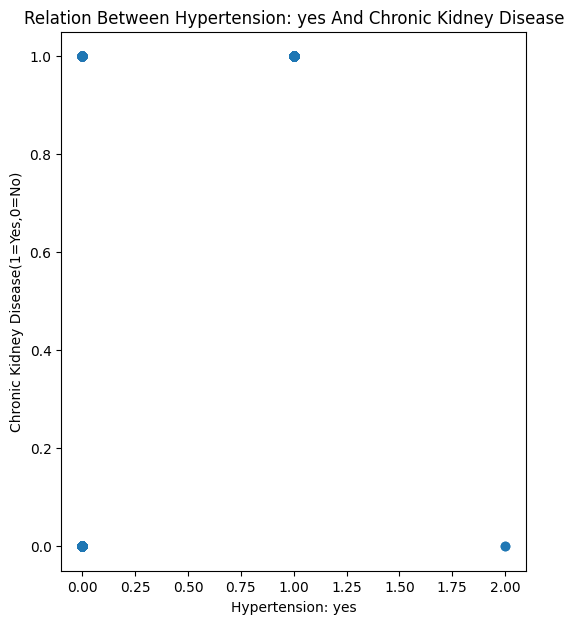

In [98]:
fig, ax = plt.subplots(figsize=(6,7))
M=data_p[['htn']]
N=data_p[['classification']]
plt.title("Relation Between Hypertension: yes And Chronic Kidney Disease");
plt.xlabel("Hypertension: yes")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

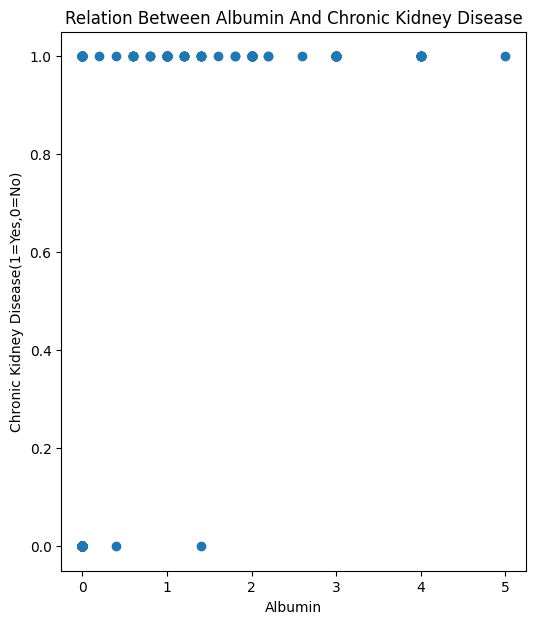

In [99]:
fig, ax = plt.subplots(figsize=(6,7))
M=data_p[['al']]
N=data_p[['classification']]
plt.title("Relation Between Albumin And Chronic Kidney Disease");
plt.xlabel("Albumin")
plt.ylabel("Chronic Kidney Disease(1=Yes,0=No)")
ax.scatter(M,N);
plt.show();

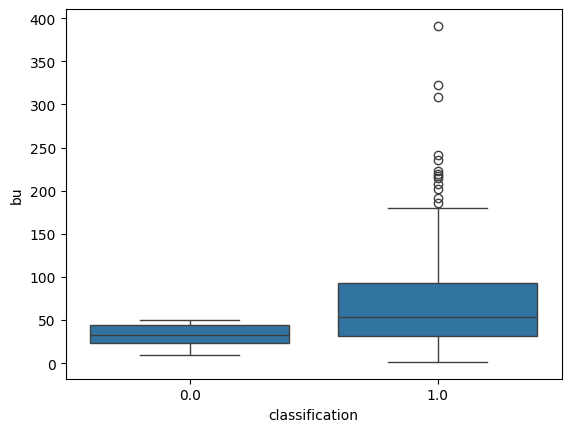

In [100]:
sns.boxplot(x=data_p['classification'], y=df['bu'])
plt.show();

In [101]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,stratify=y,test_size=0.3)

In [102]:
y_train.value_counts()

classification
1.0    175
0.0    105
Name: count, dtype: int64

In [103]:
!pip install AutoLogging_ML

In [104]:
pip install catboost

In [105]:
import catboost


In [106]:
from AutoLogging_ML import AutoLogger
a,model= AutoLogger.train_and_log_classification(x_train, y_train, x_test, y_test)

Learning rate set to 0.005982
0:	learn: 0.6812590	total: 2.6ms	remaining: 2.6s
1:	learn: 0.6719453	total: 4.71ms	remaining: 2.35s
2:	learn: 0.6603891	total: 6.72ms	remaining: 2.23s
3:	learn: 0.6525936	total: 8.71ms	remaining: 2.17s
4:	learn: 0.6436945	total: 10.7ms	remaining: 2.13s
5:	learn: 0.6342293	total: 12.9ms	remaining: 2.14s
6:	learn: 0.6262963	total: 14.9ms	remaining: 2.12s
7:	learn: 0.6190585	total: 16.8ms	remaining: 2.09s
8:	learn: 0.6075170	total: 18.8ms	remaining: 2.07s
9:	learn: 0.5980133	total: 20.8ms	remaining: 2.06s
10:	learn: 0.5889862	total: 22.6ms	remaining: 2.03s
11:	learn: 0.5801563	total: 24.4ms	remaining: 2.01s
12:	learn: 0.5726157	total: 26.4ms	remaining: 2s
13:	learn: 0.5654914	total: 29.4ms	remaining: 2.07s
14:	learn: 0.5581156	total: 32.3ms	remaining: 2.12s
15:	learn: 0.5489937	total: 34.2ms	remaining: 2.1s
16:	learn: 0.5419645	total: 36.1ms	remaining: 2.08s
17:	learn: 0.5362279	total: 37.9ms	remaining: 2.07s
18:	learn: 0.5297804	total: 39.7ms	remaining: 2.05

In [107]:
a

,model,training-accuracy,training-precision,training-recall,training-f1,training-confusion matrix,validation-accuracy,validation-precision,validation-recall,validation-f1,validation-confusion matrix,training-classification report,validation-classification report
14,quadratic discriminant analysis,62.500000,31.250000,50.000000,38.461538,"[[0, 105], [0, 175]]",62.500000,31.250000,50.000000,38.461538,"[[0, 45], [0, 75]]",precision recall f1-score ...,precision recall f1-score ...
2,svm-poly,84.642857,85.028595,87.333333,84.452279,"[[103, 2], [41, 134]]",78.333333,79.580420,81.333333,78.181818,"[[42, 3], [23, 52]]",precision recall f1-score ...,precision recall f1-score ...
1,svm-rbf,86.071429,86.257399,88.666667,85.875231,"[[104, 1], [38, 137]]",81.666667,82.372598,84.444444,81.481481,"[[43, 2], [20, 55]]",precision recall f1-score ...,precision recall f1-score ...
3,knn,91.071429,90.167494,92.285714,90.765050,"[[102, 3], [22, 153]]",85.000000,84.461153,86.666667,84.654731,"[[42, 3], [15, 60]]",precision recall f1-score ...,precision recall f1-score ...
11,bagging classifier,100.000000,100.000000,100.000000,100.000000,"[[105, 0], [0, 175]]",95.833333,95.387779,95.777778,95.574895,"[[43, 2], [3, 72]]",precision recall f1-score ...,precision recall f1-score ...
4,naive bayes,94.642857,93.983957,94.761905,94.337715,"[[100, 5], [10, 165]]",96.666667,95.918367,97.333333,96.502477,"[[45, 0], [4, 71]]",precision recall f1-score ...,precision recall f1-score ...
5,decision tree,100.000000,100.000000,100.000000,100.000000,"[[105, 0], [0, 175]]",96.666667,96.123579,96.888889,96.474736,"[[44, 1], [3, 72]]",precision recall f1-score ...,precision recall f1-score ...
8,gradient boost,100.000000,100.000000,100.000000,100.000000,"[[105, 0], [0, 175]]",96.666667,96.123579,96.888889,96.474736,"[[44, 1], [3, 72]]",precision recall f1-score ...,precision recall f1-score ...
0,svm-linear,99.642857,99.528302,99.714286,99.619767,"[[105, 0], [1, 174]]",97.500000,97.150411,97.555556,97.344937,"[[44, 1], [2, 73]]",precision recall f1-score ...,precision recall f1-score ...
9,xgboost,100.000000,100.000000,100.000000,100.000000,"[[105, 0], [0, 175]]",97.500000,97.150411,97.555556,97.344937,"[[44, 1], [2, 73]]",precision recall f1-score ...,precision recall f1-score ...


In [108]:
a.to_csv('logging results.csv')

<Axes: xlabel='validation-f1', ylabel='model'>

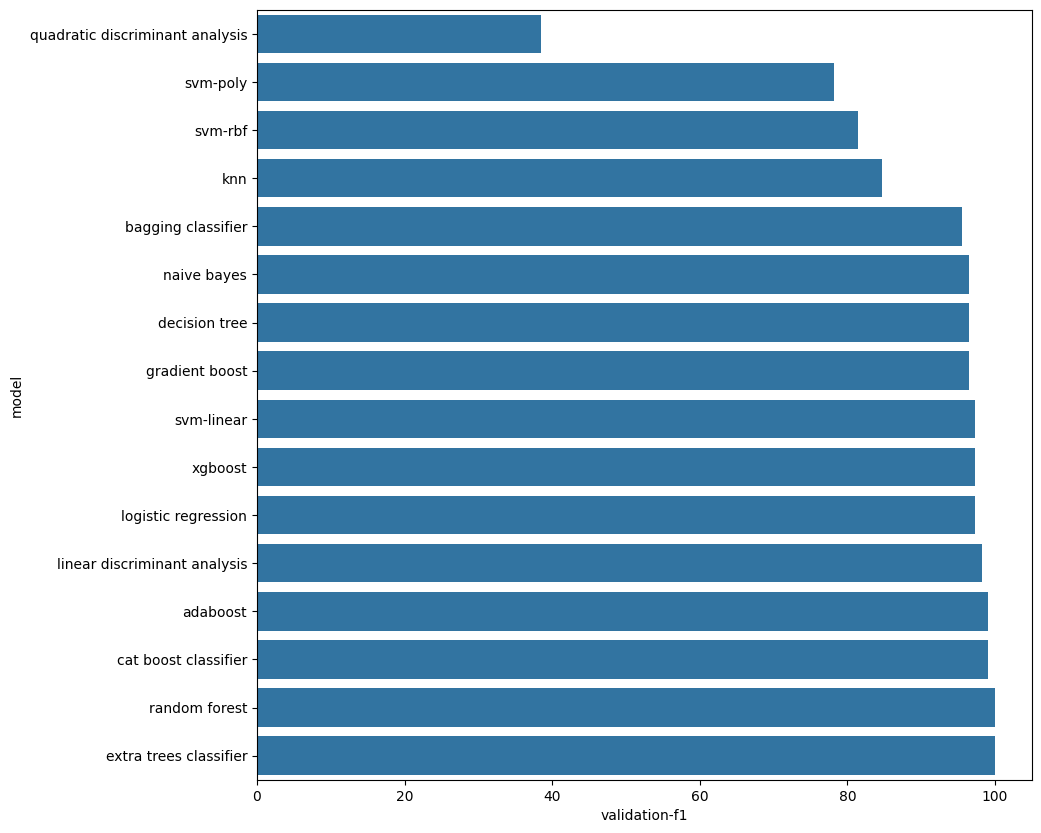

In [109]:
AutoLogger.get_metric_plot_classification(a,'validation','f1')


In [110]:
AutoLogger.get_classification_report(a,'validation')

quadratic discriminant analysis
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.62      1.00      0.77        75

    accuracy                           0.62       120
   macro avg       0.31      0.50      0.38       120
weighted avg       0.39      0.62      0.48       120

svm-poly
              precision    recall  f1-score   support

         0.0       0.65      0.93      0.76        45
         1.0       0.95      0.69      0.80        75

    accuracy                           0.78       120
   macro avg       0.80      0.81      0.78       120
weighted avg       0.83      0.78      0.79       120

svm-rbf
              precision    recall  f1-score   support

         0.0       0.68      0.96      0.80        45
         1.0       0.96      0.73      0.83        75

    accuracy                           0.82       120
   macro avg       0.82      0.84      0.81       120
weighted avg       0.86  

quadratic discriminant analysis
svm-poly
svm-rbf
knn
bagging classifier
naive bayes
decision tree
gradient boost
svm-linear
xgboost
logistic regression
linear discriminant analysis
adaboost
cat boost classifier
random forest
extra trees classifier


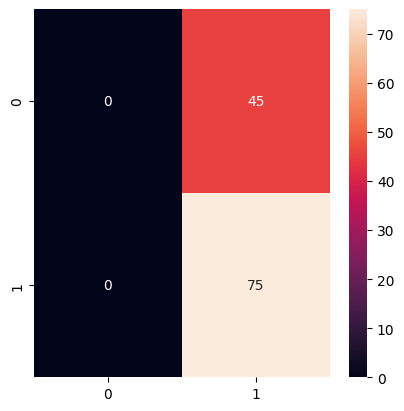

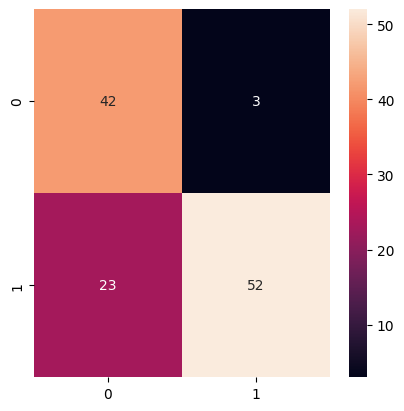

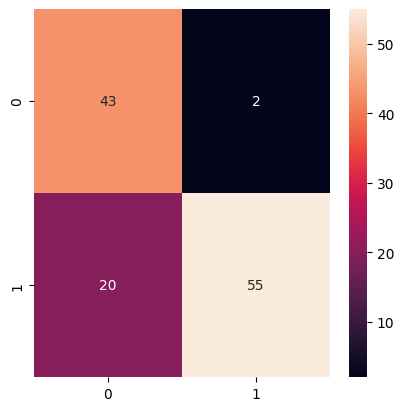

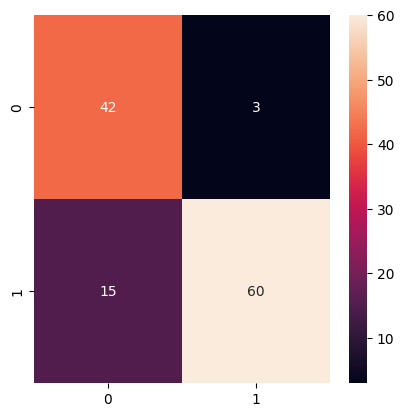

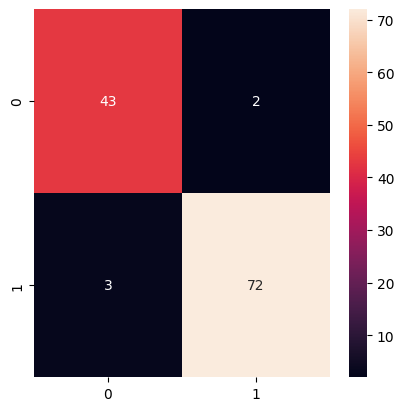

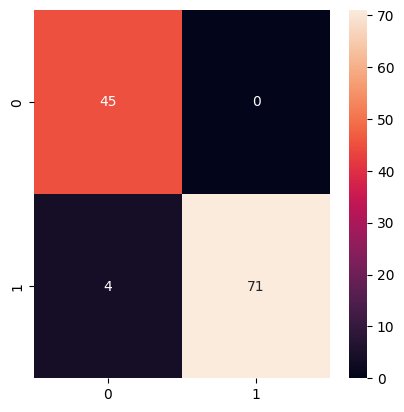

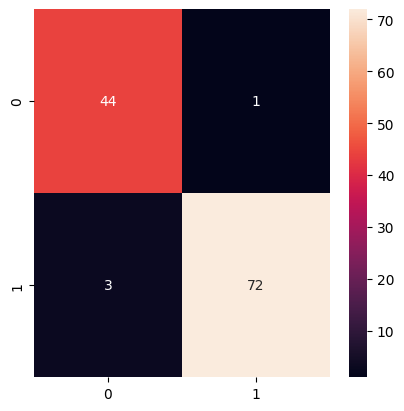

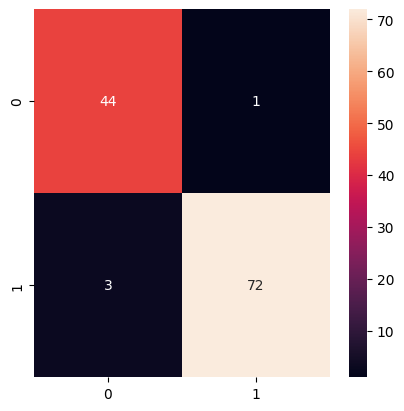

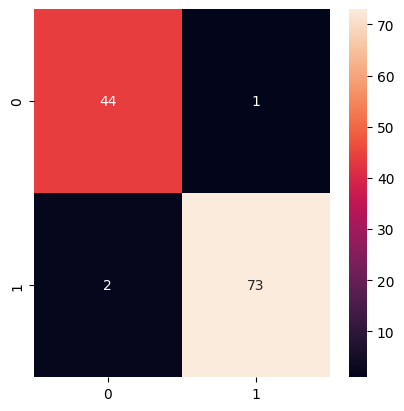

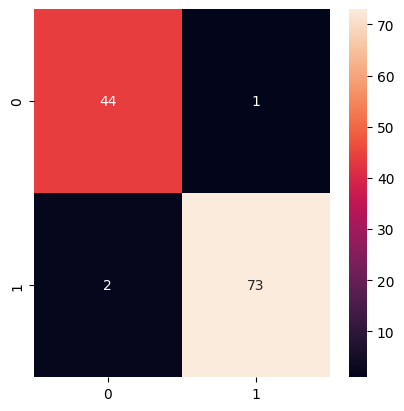

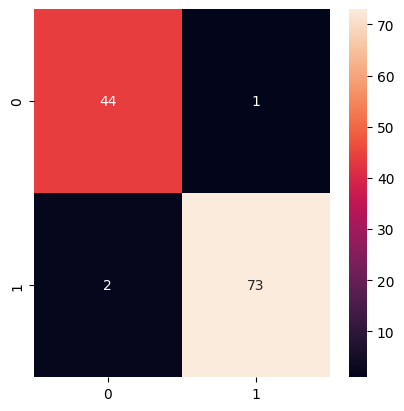

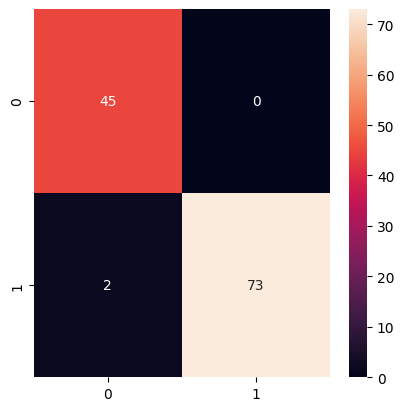

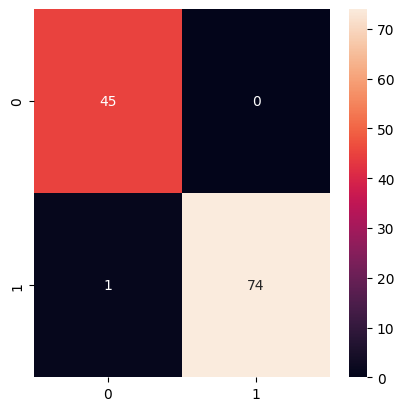

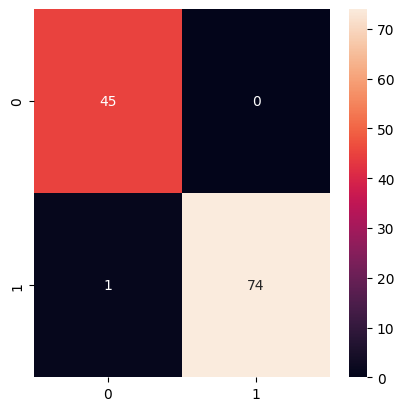

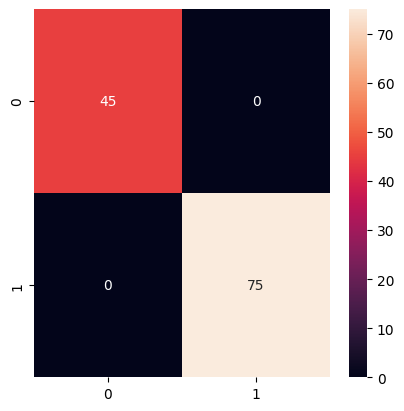

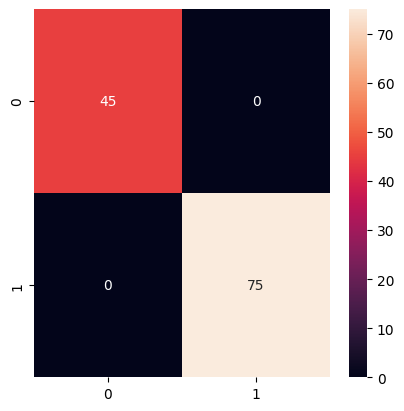

In [111]:
AutoLogger.get_confusion_matrix(a,'validation')

In [112]:
from sklearn.ensemble import StackingClassifier,VotingClassifier, RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
model1=AdaBoostClassifier()
model2=RandomForestClassifier()
model3=GradientBoostingClassifier()
model4=SVC(kernel='poly')
vc=StackingClassifier(estimators=[('ada',model1),('rf',model2),('gb',model3)],final_estimator=model4)
vc.fit(x_train,y_train)

StackingClassifier(estimators=[('ada', AdaBoostClassifier()),
                               ('rf', RandomForestClassifier()),
                               ('gb', GradientBoostingClassifier())],
                   final_estimator=SVC(kernel='poly'))

0.9833333333333333
0.9822222222222222
0.9822222222222222
0.9822222222222223
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        45
         1.0       0.99      0.99      0.99        75

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



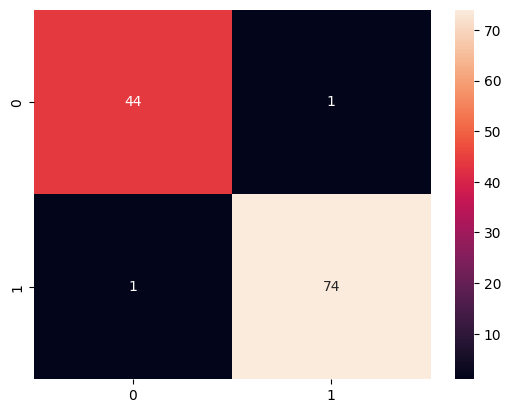

In [113]:
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score, confusion_matrix, classification_report
print(accuracy_score(y_test,vc.predict(x_test)))
print(precision_score(y_test,vc.predict(x_test),average='macro'))
print(recall_score(y_test,vc.predict(x_test),average='macro'))
print(f1_score(y_test,vc.predict(x_test),average='macro'))
sns.heatmap(confusion_matrix(y_test,vc.predict(x_test)),annot=True)
print(classification_report(y_test,vc.predict(x_test)))

In [114]:
import pickle
pickle.dump(model,open('ckd model.pkl','wb'))